In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
import os

data = os.listdir("./breast-histopathology-images/")
len(data)

279

Let's take a look at the first 10:

In [3]:
data[:10]

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262']

Within each of these folders, there's a `0` and `1` folder:

In [4]:
patient_10253 = os.listdir("./breast-histopathology-images/10253")

In [5]:
patient_10253_0 = os.listdir("./breast-histopathology-images/10253/0")
patient_10253_1 = os.listdir("./breast-histopathology-images/10253/1")

print(patient_10253_0[:5])
print(patient_10253_1[:5])

['10253_idx5_x1001_y1001_class0.png', '10253_idx5_x1001_y1051_class0.png', '10253_idx5_x1001_y1101_class0.png', '10253_idx5_x1001_y1151_class0.png', '10253_idx5_x1001_y1201_class0.png']
['10253_idx5_x501_y351_class1.png', '10253_idx5_x501_y401_class1.png', '10253_idx5_x551_y301_class1.png', '10253_idx5_x551_y351_class1.png', '10253_idx5_x551_y401_class1.png']


In [6]:
df_0 = pd.DataFrame()

for path in patient_10253_0:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 0
    
    data = {"path":"./breast-histopathology-images/10253/0/"+path,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_0 = df_0.append(data, ignore_index=True)
    
    
print(df_0)

df_1 = pd.DataFrame()

for path in patient_10253_1:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = 1
    
    data = {"path":"./breast-histopathology-images/10253/1/"+path,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class}
    
    df_1 = df_1.append(data, ignore_index=True)
    
df = df_0.append(df_1).reset_index(drop=True)
df

     idc_class                                               path x_coord  \
0          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
1          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
2          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
3          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
4          0.0  ./breast-histopathology-images/10253/0/10253_i...    1001   
..         ...                                                ...     ...   
474        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
475        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
476        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
477        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   
478        0.0  ./breast-histopathology-images/10253/0/10253_i...     951   

    y_coord  
0      1001  
1      1051  
2      1101  
3      1151  
4    

,idc_class,path,x_coord,y_coord
0,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1001
1,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1051
2,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1101
3,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1151
4,0.0,./breast-histopathology-images/10253/0/10253_i...,1001,1201
...,...,...,...,...
544,1.0,./breast-histopathology-images/10253/1/10253_i...,851,601
545,1.0,./breast-histopathology-images/10253/1/10253_i...,851,651
546,1.0,./breast-histopathology-images/10253/1/10253_i...,851,701
547,1.0,./breast-histopathology-images/10253/1/10253_i...,851,751


In [7]:
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')

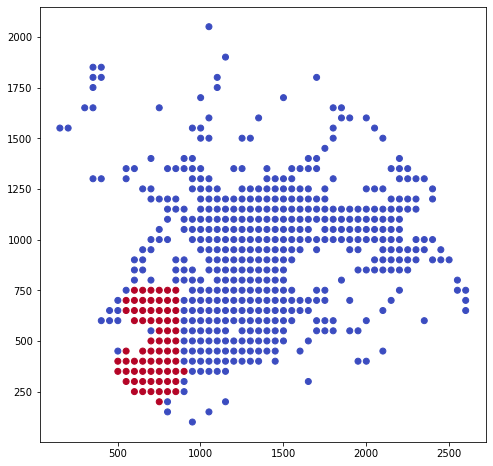

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x = df['x_coord'], y=df['y_coord'], c=df['idc_class'], cmap='coolwarm')
plt.show()

In [9]:
grid = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (100, 100, 3)).astype(np.uint8)

In [10]:
grid.shape

(100, 100, 3)

In [11]:
max_x = df['x_coord'].max()
max_y = df['y_coord'].max()

# Shape of (2101, 2651, 3)
# A placeholder for each pixel, with 3 color options and max values for each channel (RGB)
grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        idc_class = df['idc_class'][i]
            
        # Extract X and Y coordinates
        x_coord = df['x_coord'][i]
        y_coord = df['y_coord'][i]
        # Add 50 pixels to find ending boundary for each image
        x_end = x_coord + 50
        y_end = y_coord + 50
        
        # Assign image pixel values to placeholder 255 values
        """
        Image is something along the lines of:
        [[[206 164 226]
          [196 154 224]
          [211 175 225]
          ...
          [237 221 240]
          [214 184 232]
          [235 213 243]],
          ...        
        """
        # `grid` will then contain each patch's image values encoded into the grid
        grid[y_coord:y_end, x_coord:x_end] = image
        
        # If `idc_class` is `1`, change the RED channel of the `mask` to 255 (intense red)
        # and other channels to `0` (remove color info, leaving just red)
        if idc_class == 1:
            mask[y_coord:y_end, x_coord:x_end, :1] = 255
            mask[y_coord:y_end, x_coord:x_end, 1:] = 0

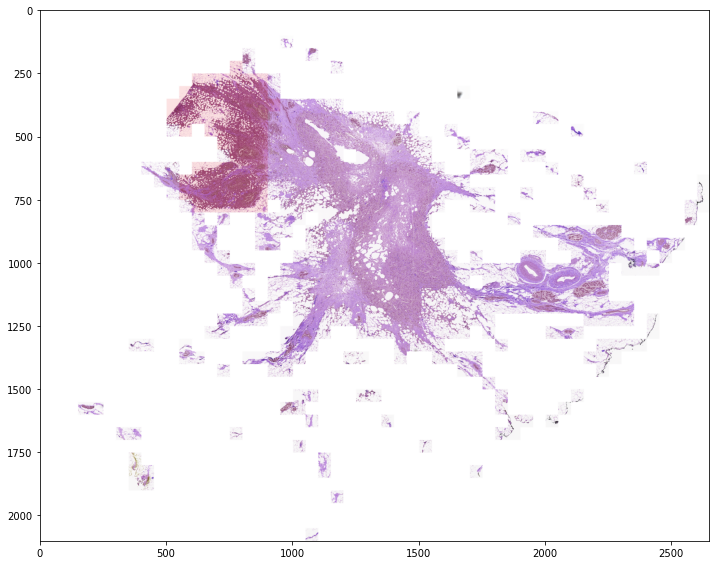

In [12]:
plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.imshow(mask, alpha=0.1)
plt.show()

In [13]:
from glob import glob
data = glob('./breast-histopathology-images/**/*.png', recursive=True)
print(len(data))
# 277524

277524


In [14]:
dfs = []

# This takes a while!
for index, path in enumerate(data):
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    patient_id = split[0].split('\\')[1]
    x_coord = split[2][1:]
    y_coord = split[3][1:]
    idc_class = split[4][-5]
    
    df_data = {"patient_id": patient_id,
            "x_coord": x_coord,
            "y_coord": y_coord,
            "idc_class": idc_class,
            "path": path}
    df = pd.DataFrame()
    
    dfs.append(df.append(df_data, ignore_index=True))
    print(f'Finished {index}/{len(data)}', end='\r')
    
df_all = pd.concat(dfs)

In [15]:
df_all = df_all.reset_index(drop=True)

In [16]:
df_all

,idc_class,path,patient_id,x_coord,y_coord
0,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1001
1,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1051
2,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1101
3,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1151
4,0,./breast-histopathology-images\10253\0\10253_i...,10253,1001,1201
...,...,...,...,...,...
277519,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2051,901
277520,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2051,951
277521,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2101,1001
277522,1,./breast-histopathology-images\9383\1\9383_idx...,9383,2101,901


In [17]:
df_all['x_coord'] = df_all['x_coord'].astype('int')
df_all['y_coord'] = df_all['y_coord'].astype('int')
df_all['idc_class'] = df_all['idc_class'].astype('int')

<AxesSubplot:xlabel='idc_class', ylabel='count'>

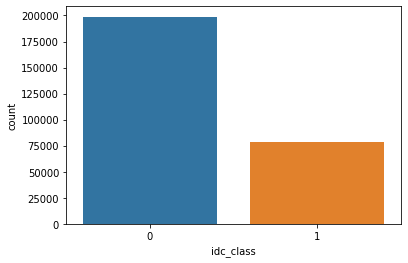

In [18]:
import seaborn as sns
sns.countplot(x='idc_class', data=df_all)

In [19]:
df_all['patient_id'].value_counts()

13693    2395
16550    2302
10288    2278
10308    2278
9323     2216
         ... 
16895     151
9175      118
8957      111
9262       94
16534      63
Name: patient_id, Length: 279, dtype: int64

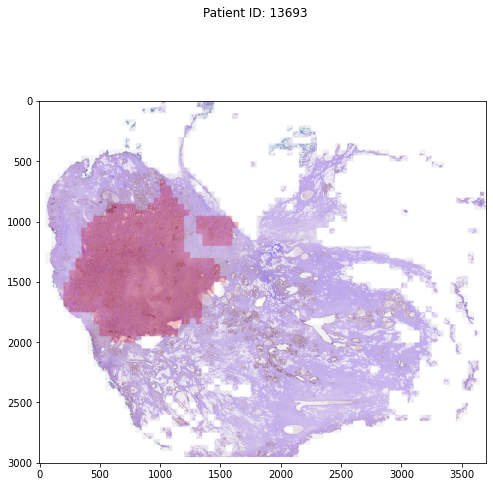

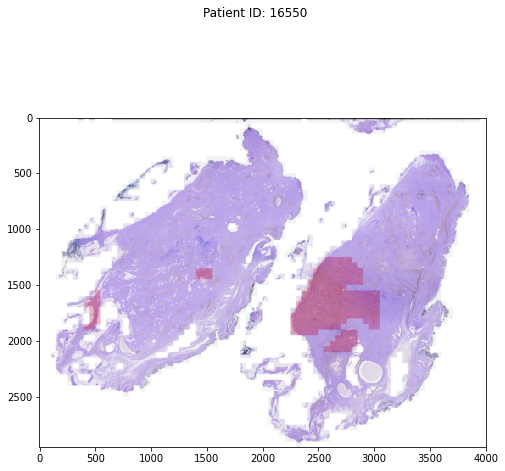

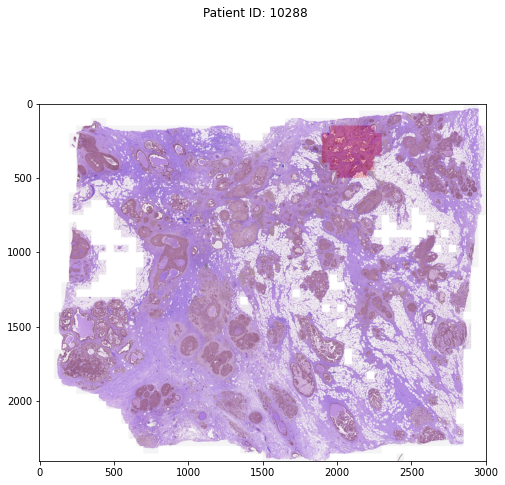

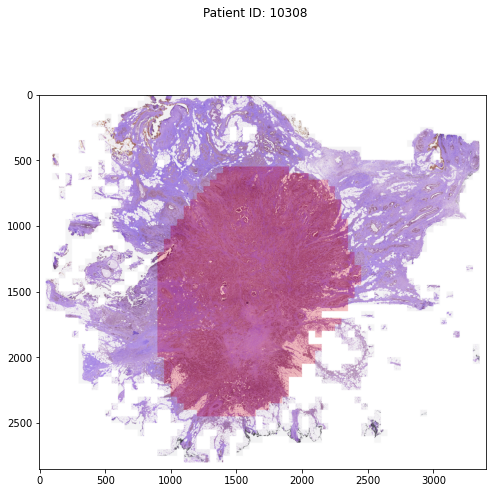

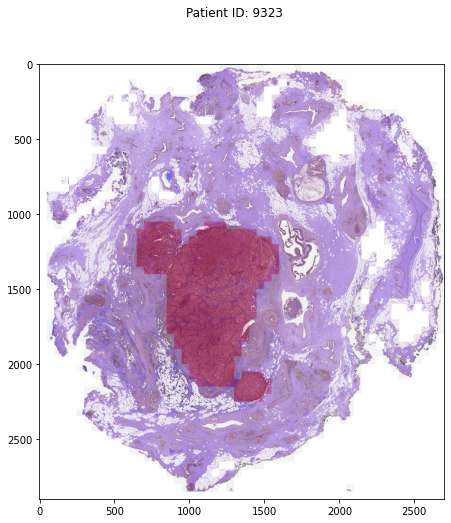

In [20]:
patient_ids = ['13693', '16550', '10288', '10308', '9323']

for patient_id in patient_ids:
    df = df_all.loc[df_all['patient_id'] == patient_id].reset_index(drop=True)
    max_x = df['x_coord'].max()
    max_y = df['y_coord'].max()
    
    grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

    for i in range(len(df)):
        # Get image and label
        image = cv2.imread(df['path'][i])
        if(image.shape==(50, 50, 3)):
            idc_class = df['idc_class'][i]
            x_coord = df['x_coord'][i]
            y_coord = df['y_coord'][i]
            x_end = x_coord + 50
            y_end = y_coord + 50
            
            grid[y_coord:y_end, x_coord:x_end] = image

            if idc_class == 1:
                mask[y_coord:y_end, x_coord:x_end, :1] = 255
                mask[y_coord:y_end, x_coord:x_end, 1:] = 0
                
    plt.figure(figsize=(8, 8))
    plt.suptitle(f'Patient ID: {patient_id}')
    plt.imshow(grid)
    plt.imshow(mask, alpha=0.2)
    plt.show()

In [21]:
if not os.path.exists('./hist_images_truncated/'):
    os.mkdir('./hist_images_truncated/')

    os.mkdir('./hist_images_truncated/train/')
    os.mkdir('./hist_images_truncated/test/')

    os.mkdir('./hist_images_truncated/train/0/')
    os.mkdir('./hist_images_truncated/train/1/')
    os.mkdir('./hist_images_truncated/test/0/')
    os.mkdir('./hist_images_truncated/test/1/')

In [22]:
for batch_num, indices in enumerate(range(1000, int(len(data)/5), 1000), 1):
    x = []
    y = []

    for i in data[indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
        
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.3)

    for index, img in enumerate(x_train):
        idc_class = y_train[index]
        cv2.imwrite(f"./hist_images_truncated/train/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))

    for index, img in enumerate(x_test):
        idc_class = y_test[index]
        cv2.imwrite(f"./hist_images_truncated/test/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))

    import gc
    x = None
    y = None
    gc.collect()

Processing batch 1, with images from 0 to 1000
Processing batch 2, with images from 1000 to 2000
Processing batch 3, with images from 2000 to 3000
Processing batch 4, with images from 3000 to 4000
Processing batch 5, with images from 4000 to 5000
Processing batch 6, with images from 5000 to 6000
Processing batch 7, with images from 6000 to 7000
Processing batch 8, with images from 7000 to 8000
Processing batch 9, with images from 8000 to 9000
Processing batch 10, with images from 9000 to 10000
Processing batch 11, with images from 10000 to 11000
Processing batch 12, with images from 11000 to 12000
Processing batch 13, with images from 12000 to 13000
Processing batch 14, with images from 13000 to 14000
Processing batch 15, with images from 14000 to 15000
Processing batch 16, with images from 15000 to 16000
Processing batch 17, with images from 16000 to 17000
Processing batch 18, with images from 17000 to 18000
Processing batch 19, with images from 18000 to 19000
Processing batch 20, wit

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images_truncated/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images_truncated/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=False)

Found 33442 images belonging to 2 classes.
Found 14331 images belonging to 2 classes.
Found 20476 images belonging to 2 classes.


In [24]:
class_weights = {0:1, 1:1.5}

In [25]:
next(train_generator)[0].shape

(16, 200, 200, 3)

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(l=0.01), padding='same', input_shape=[200, 200, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

model.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_custom_cnn.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]


history = model.fit(train_generator,
                    validation_data = valid_generator,
                    callbacks = callbacks,
                    epochs = 25,
                    class_weight = class_weights)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                        

Finally, let's `evaluate()` the baseline model:

In [27]:
model.evaluate(test_generator)

1280/1280 [==============================] - 63s 49ms/step - loss: 0.9314 - binary_accuracy: 0.7188 - precision: 0.7342 - recall: 0.1056 - auc: 0.7846


[0.9314112067222595,
 0.718792736530304,
 0.7342342138290405,
 0.1056041494011879,
 0.7846102118492126]

1/1 [==============================] - 0s 14ms/step


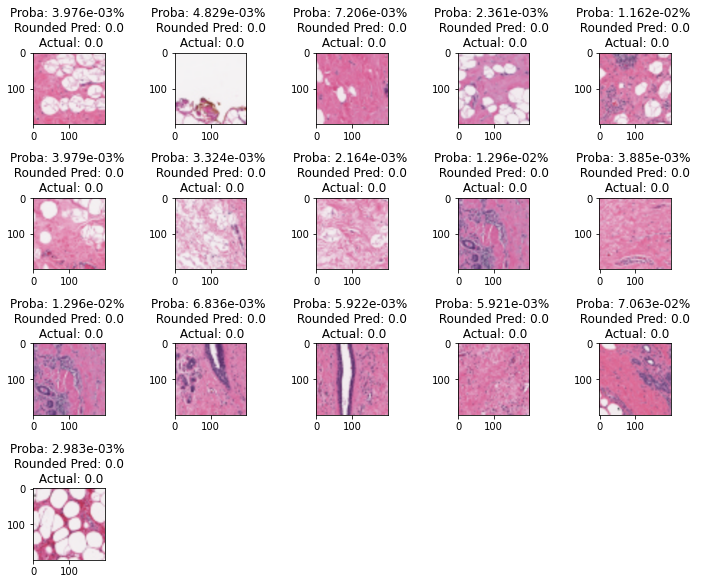

In [28]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

In [29]:
y_pred = model.predict(test_generator)

1280/1280 [==============================] - 28s 22ms/step


<AxesSubplot:ylabel='count'>

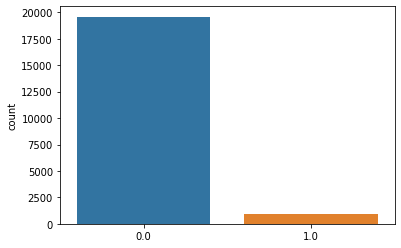

In [30]:
import seaborn as sns
sns.countplot(x=np.round(np.squeeze(y_pred)))

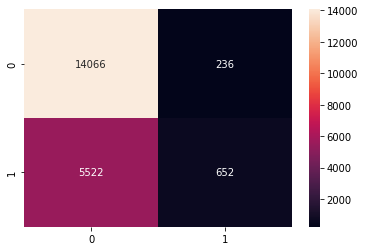

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [32]:
model2 = keras.models.Sequential([
    keras.applications.EfficientNetV2B0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetv2b0-imagenet.h5', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model2.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history2 = model2.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 5,920,593
Trainable params: 5,859,985
Non-trainable params: 60,608
_________________________________________________________________
Epoch 1/15
2091/2091 [=================

Let's `evaluate()` the model:

In [33]:
model2.evaluate(test_generator)

1280/1280 [==============================] - 43s 34ms/step - loss: 0.2821 - binary_accuracy: 0.8855 - precision_1: 0.7955 - recall_1: 0.8350 - auc_1: 0.9452


[0.2820552587509155,
 0.8855245113372803,
 0.7955247163772583,
 0.8349530100822449,
 0.9451705813407898]

Finally, the evaluation doesn't mean much without visually inspecting the results:

1/1 [==============================] - 0s 23ms/step


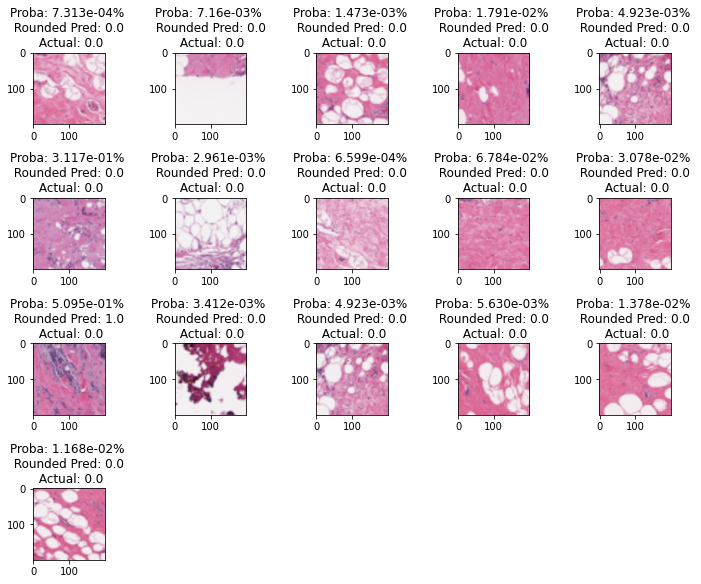

In [34]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model2.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

And finally, let's predict the test samples and plot the confusion matrix:

In [35]:
y_pred = model2.predict(test_generator)

1280/1280 [==============================] - 38s 29ms/step


<AxesSubplot:ylabel='count'>

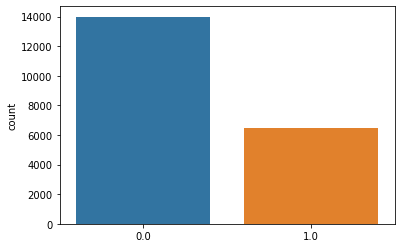

In [36]:
sns.countplot(x=np.round(np.squeeze(y_pred)))

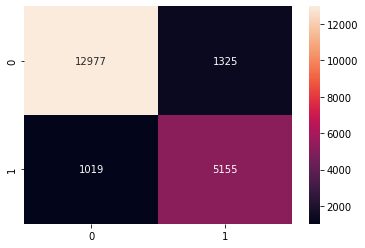

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [38]:
model3 = keras.models.Sequential([
    keras.applications.VGG16(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_vgg16.h5',  save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model3.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history3 = model3.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 batch_normalization_7 (Batc  (None, 6, 6, 512)        2048      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,717,249
Trainable params: 14,716,225


In [39]:
model3.evaluate(test_generator)

1280/1280 [==============================] - 88s 69ms/step - loss: 202336704.0000 - binary_accuracy: 0.8257 - precision_2: 0.6637 - recall_2: 0.8552 - auc_2: 0.9055


[202336704.0,
 0.8256983757019043,
 0.6637334823608398,
 0.8551992177963257,
 0.905518114566803]

1280/1280 [==============================] - 80s 63ms/step


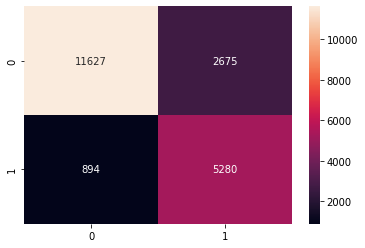

In [40]:
y_pred = model3.predict(test_generator)

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [41]:
model4 = keras.models.Sequential([
    keras.applications.ResNet50(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_resnet50.h5',  save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model4.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history4 = model4.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/15
2091/2091 [==============================] - 482s 228ms/step - loss: 0.5042 - binary_accuracy: 0.8168 - precision_3: 0.6716 - recall_3: 0.7708 - auc_3: 0.8764 - val_loss: 0.6231 - val_binary_accuracy: 0.7773 - val_precision_

In [42]:
model4.evaluate(test_generator)

1280/1280 [==============================] - 71s 55ms/step - loss: 0.4026 - binary_accuracy: 0.8328 - precision_3: 0.7533 - recall_3: 0.6623 - auc_3: 0.8912


[0.40256285667419434,
 0.8327798247337341,
 0.7533161640167236,
 0.6622934937477112,
 0.8912229537963867]

1280/1280 [==============================] - 65s 50ms/step


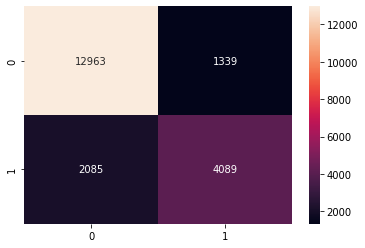

In [43]:
y_pred = model4.predict(test_generator)

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [44]:
model5 = keras.models.Sequential([
    keras.applications.Xception(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1, activation='sigmoid')
])

model5.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_xception.h5',  save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model5.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history5 = model5.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     epochs = 15,
                     class_weight = class_weights)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/15
2091/2091 [==============================] - 636s 302ms/step - loss: 0.4523 - binary_accuracy: 0.8449 - precision_4: 0.7224 - recall_4: 0.7909 - auc_4: 0.8993 - val_loss: 0.5262 - val_binary_accuracy: 0.7760 - val_precision_

In [45]:
model5.evaluate(test_generator)

1280/1280 [==============================] - 74s 58ms/step - loss: 0.2976 - binary_accuracy: 0.8842 - precision_4: 0.8229 - recall_4: 0.7849 - auc_4: 0.9435


[0.2976227402687073,
 0.8842058777809143,
 0.8228901624679565,
 0.784904420375824,
 0.9434617757797241]

1280/1280 [==============================] - 68s 53ms/step


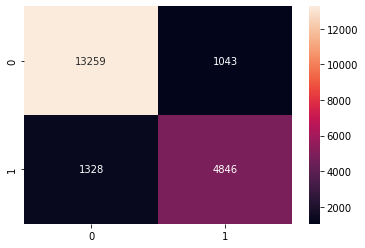

In [46]:
y_pred = model5.predict(test_generator)

import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

1280/1280 [==============================] - 73s 57ms/step - loss: 0.2976 - binary_accuracy: 0.8842 - precision_4: 0.8229 - recall_4: 0.7849 - auc_4: 0.9435
              Recall  Precision       AUC
Custom CNN  0.105604   0.734234  0.784610
EffNetB0    0.834953   0.795525  0.945171
VGG16       0.855199   0.663733  0.905518
ResNet50    0.662293   0.753316  0.891223
Xception    0.784904   0.822890  0.943462


<AxesSubplot:xlabel='variable', ylabel='value'>

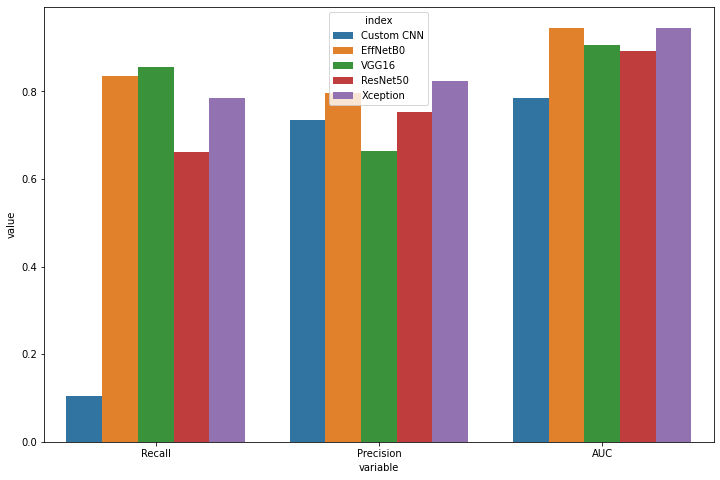

In [47]:
# Evaluate the models to get performance stats
preds_custom = model.evaluate(test_generator)
preds_effnet = model2.evaluate(test_generator)
preds_vgg = model3.evaluate(test_generator)
preds_resnet = model4.evaluate(test_generator)
preds_xception = model5.evaluate(test_generator)

# Extract into relevant model-related stats
cnn_recall, cnn_precision, cnn_auc, cnn_params = preds_custom[3], preds_custom[2], preds_custom[4], model.count_params()
effnet_recall, effnet_precision, effnet_auc, effnet_params = preds_effnet[3], preds_effnet[2], preds_effnet[4], model2.count_params()
vgg_recall, vgg_precision, vgg_auc, vgg_params = preds_vgg[3], preds_vgg[2], preds_vgg[4], model3.count_params()
resnet_recall, resnet_precision, resnet_auc, resnet_params = preds_resnet[3], preds_resnet[2], preds_resnet[4], model4.count_params()
xception_recall, xception_precision, xception_auc, xcecption_params = preds_xception[3], preds_xception[2], preds_xception[4], model5.count_params()

# Create dict to hold values
data = {
    'Custom CNN' : [cnn_recall, cnn_precision, cnn_auc],
    'EffNetB0' : [effnet_recall, effnet_precision, effnet_auc],
    'VGG16' : [vgg_recall, vgg_precision, vgg_auc],
    'ResNet50' : [resnet_recall, resnet_precision, resnet_auc],
    'Xception' : [xception_recall, xception_precision, xception_auc]
}

# Dict to DF
df = pd.DataFrame(data, index = ["Recall", "Precision", "AUC"]).T

print(df)

fig, ax = plt.subplots(figsize=(12, 8))

df_bar = df.reset_index().melt(id_vars=["index"])
sns.barplot(x="variable", y="value", hue="index", data=df_bar, ax=ax)

In [52]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def f1_loss(y_true, y_pred):
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [53]:
model_test = keras.models.Sequential([
    keras.applications.EfficientNetV2B0(input_shape=(200,100,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_f1_loss.h5',  save_best_only=True, monitor="val_f1"),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model_test.compile(loss=f1_loss,
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

model_test_history = model_test.fit(train_generator,
                     validation_data=valid_generator,
                     callbacks=callbacks,
                     epochs=15,
                    class_weight=class_weights)

Epoch 1/15
2091/2091 [==============================] - 358s 168ms/step - loss: 0.3954 - f1: 0.6523 - binary_accuracy: 0.7749 - precision_1: 0.6017 - recall_1: 0.7555 - auc_1: 0.7829 - val_loss: 0.3363 - val_f1: 0.6627 - val_binary_accuracy: 0.8191 - val_precision_1: 0.7113 - val_recall_1: 0.6757 - val_auc_1: 0.7872 - lr: 0.0010
Epoch 2/15
2091/2091 [==============================] - 344s 165ms/step - loss: 0.4060 - f1: 0.6428 - binary_accuracy: 0.7544 - precision_1: 0.5682 - recall_1: 0.7810 - auc_1: 0.7657 - val_loss: 0.4341 - val_f1: 0.5658 - val_binary_accuracy: 0.7736 - val_precision_1: 0.6419 - val_recall_1: 0.5674 - val_auc_1: 0.7155 - lr: 0.0010
Epoch 3/15
2091/2091 [==============================] - 344s 165ms/step - loss: 0.3977 - f1: 0.6506 - binary_accuracy: 0.7825 - precision_1: 0.6190 - recall_1: 0.7297 - auc_1: 0.7818 - val_loss: 0.2840 - val_f1: 0.7157 - val_binary_accuracy: 0.8251 - val_precision_1: 0.6736 - val_recall_1: 0.8176 - val_auc_1: 0.8319 - lr: 0.0010
Epoch 4

In [56]:
model_test.evaluate(test_generator)

1280/1280 [==============================] - 43s 33ms/step - loss: 0.7562 - f1: 0.2439 - binary_accuracy: 0.8247 - precision_1: 0.7059 - recall_1: 0.7177 - auc_1: 0.7964


[0.7562007904052734,
 0.24393752217292786,
 0.82472163438797,
 0.7059104442596436,
 0.7176870703697205,
 0.7963916063308716]

1280/1280 [==============================] - 38s 29ms/step


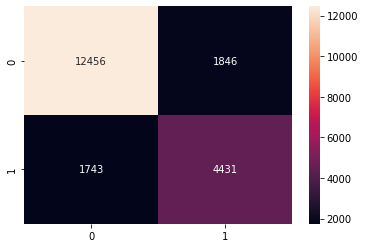

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_test.predict(test_generator)

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [ ]:
if not os.path.exists('./hist_images/'):
    os.mkdir('./hist_images/')

    os.mkdir('./hist_images/train/')
    os.mkdir('./hist_images/test/')

    os.mkdir('./hist_images/train/0/')
    os.mkdir('./hist_images/train/1/')
    os.mkdir('./hist_images/test/0/')
    os.mkdir('./hist_images/test/1/')

In [ ]:
from glob import glob
data = glob('./breast-histopathology-images/**/*.png', recursive=True)
print(len(data))

In [ ]:
for batch_num, indices in enumerate(range(1000, len(data), 1000), 1):
    x = []
    y = []

    for i in data[indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
        
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.3)

    for index, img in enumerate(x_train):
        idc_class = y_train[index]
        cv2.imwrite(f"./hist_images/train/{int(idc_class)}/batch_{batch_num}_sample_{index}.png", img.astype('int'))

    for index, img in enumerate(x_test):
        idc_class = y_test[index]
        cv2.imwrite(f"./hist_images/test/{int(idc_class)}/batch_{batch_num}_sample_{index}.png", img.astype('int'))

    import gc
    x = None
    y = None
    gc.collect()

In [58]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('./hist_images/train/', 
                                                    batch_size=16, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
valid_generator = train_datagen.flow_from_directory('./hist_images/train/', 
                                                    batch_size=16, subset="validation", 
                                                    class_mode='binary', 
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('./hist_images/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=False)

Found 116341 images belonging to 2 classes.
Found 49859 images belonging to 2 classes.
Found 55400 images belonging to 2 classes.


In [59]:
model_all = keras.models.Sequential([
    keras.applications.EfficientNetV2B0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model_all.summary()

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0-imagenet-all_b0.h5', save_best_only=True, monitor='val_f1'),
    tf.keras.callbacks.ReduceLROnPlateau()
]

model_all.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 5,920,593
Trainable params: 5,859,985
Non-trainable params: 60,608
_________________________________________________________________


In [60]:
history = model_all.fit(train_generator,
                     validation_data = valid_generator,
                     callbacks = callbacks,
                     class_weight = class_weights,
                     epochs = 25)

Epoch 1/25
7272/7272 [==============================] - 6802s 934ms/step - loss: 0.4152 - f1: 0.7284 - binary_accuracy: 0.8522 - precision_2: 0.7198 - recall_2: 0.7823 - auc_2: 0.9117 - val_loss: 0.2897 - val_f1: 0.7849 - val_binary_accuracy: 0.8833 - val_precision_2: 0.7639 - val_recall_2: 0.8505 - val_auc_2: 0.9441 - lr: 0.0010
Epoch 2/25
7272/7272 [==============================] - 1297s 178ms/step - loss: 0.3683 - f1: 0.7586 - binary_accuracy: 0.8702 - precision_2: 0.7487 - recall_2: 0.8148 - auc_2: 0.9310 - val_loss: 0.2575 - val_f1: 0.7934 - val_binary_accuracy: 0.8906 - val_precision_2: 0.7733 - val_recall_2: 0.8678 - val_auc_2: 0.9548 - lr: 0.0010
Epoch 3/25
7272/7272 [==============================] - 1191s 164ms/step - loss: 0.3509 - f1: 0.7709 - binary_accuracy: 0.8772 - precision_2: 0.7607 - recall_2: 0.8260 - auc_2: 0.9376 - val_loss: 0.2841 - val_f1: 0.7952 - val_binary_accuracy: 0.8855 - val_precision_2: 0.7491 - val_recall_2: 0.8954 - val_auc_2: 0.9532 - lr: 0.0010
Epoc

No handles with labels found to put in legend.


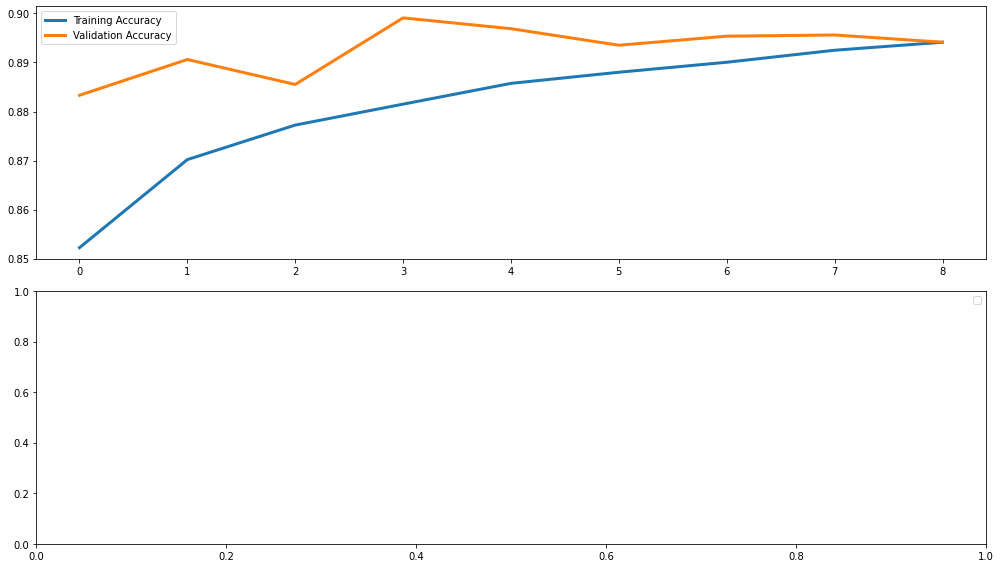

In [61]:
import pandas as pd

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(2, figsize=(14,8))
num_epochs = model_history.shape[0]

ax[0].plot(np.arange(0, num_epochs), model_history["binary_accuracy"], 
        label="Training Accuracy", lw=3)
ax[0].plot(np.arange(0, num_epochs), model_history["val_binary_accuracy"], 
        label="Validation Accuracy", lw=3)

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

3463/3463 [==============================] - 756s 218ms/step


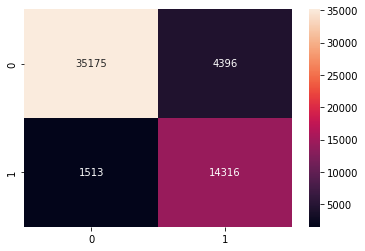

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model_all.predict(test_generator)

sns.heatmap(confusion_matrix(test_generator.classes, np.round(y_pred)), annot=True, fmt='g')
plt.show()

In [63]:
test_generator = test_datagen.flow_from_directory('./hist_images/test/', 
                                                  batch_size=16, 
                                                  class_mode='binary', 
                                                  target_size=(200, 200),
                                                  shuffle=True)

Found 55400 images belonging to 2 classes.


In [64]:
model_all.evaluate(test_generator)

3463/3463 [==============================] - 115s 33ms/step - loss: 0.2539 - f1: 0.8104 - binary_accuracy: 0.8933 - precision_2: 0.7651 - recall_2: 0.9044 - auc_2: 0.9598


[0.2539427876472473,
 0.8104234337806702,
 0.8933393359184265,
 0.7650705575942993,
 0.9044159650802612,
 0.959782600402832]

1/1 [==============================] - 0s 23ms/step


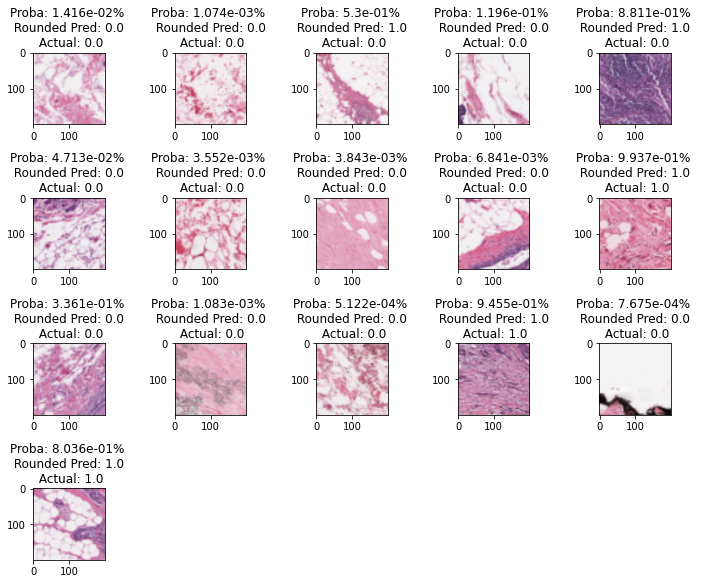

In [65]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model_all.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

In [66]:
model = keras.models.load_model('breast_cancer_effnetb0-imagenet-all_b0.h5', custom_objects={'f1':f1})

In [67]:
batch = next(test_generator)
images = batch[0]
labels = batch[1]

1/1 [==============================] - 1s 1s/step


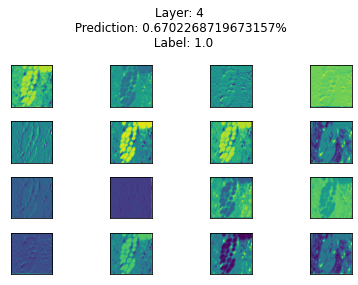

1/1 [==============================] - 0s 25ms/step


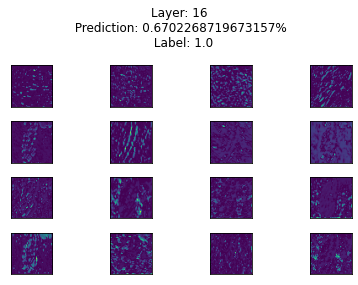

1/1 [==============================] - 0s 26ms/step


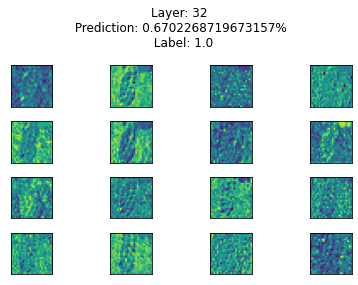

1/1 [==============================] - 0s 27ms/step


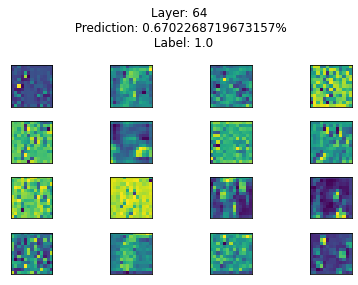

1/1 [==============================] - 0s 25ms/step


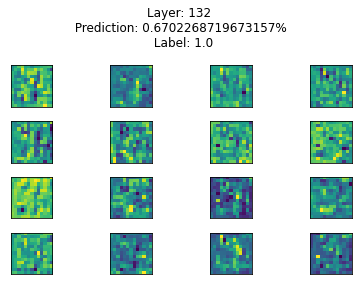

1/1 [==============================] - 0s 24ms/step


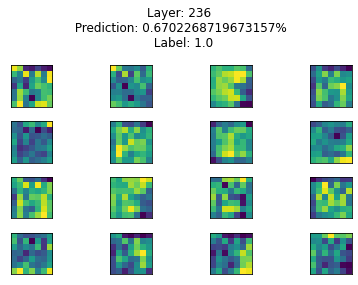

In [68]:
for layer_num in [4, 16, 32, 64, 132, 236]:
        model_trunc = keras.Model(inputs=model.layers[0].inputs, outputs=model.layers[0].layers[layer_num].output)
    
        feature_maps = model_trunc.predict(np.expand_dims(images[0], 0))
        pred = model.predict(np.expand_dims(images[0], 0))
        label = labels[0]
        
        ix = 1
        for _ in range(4):
            plt.suptitle(f'Layer: {layer_num} \n Prediction: {np.squeeze(pred)}% \n Label: {label}')
            
            for _ in range(4):
                # specify subplot and turn of axis
                ax = plt.subplot(4, 4, ix)
                ax.imshow(feature_maps[0, :, :, ix-1])
                ax.set_xticks([])
                ax.set_yticks([])
                ix += 1
        
        plt.tight_layout()
        plt.show()